In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Перш за все завантажимо дані

In [75]:
train_data = pd.read_csv("./data/train.csv")
test_data = pd.read_csv("./data/test.csv")

Подивимось як виглядають дані

In [76]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [78]:
def display_data(data):
    for column in data.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=data[column], color='navy', kde=True, bins=50)
        plt.title(f'Histogram of {column}')
        plt.grid(True)
        plt.show()

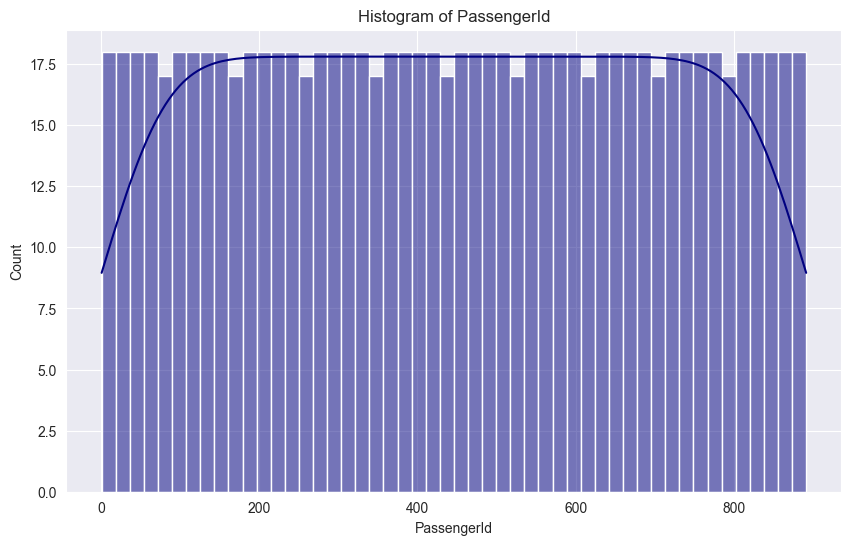

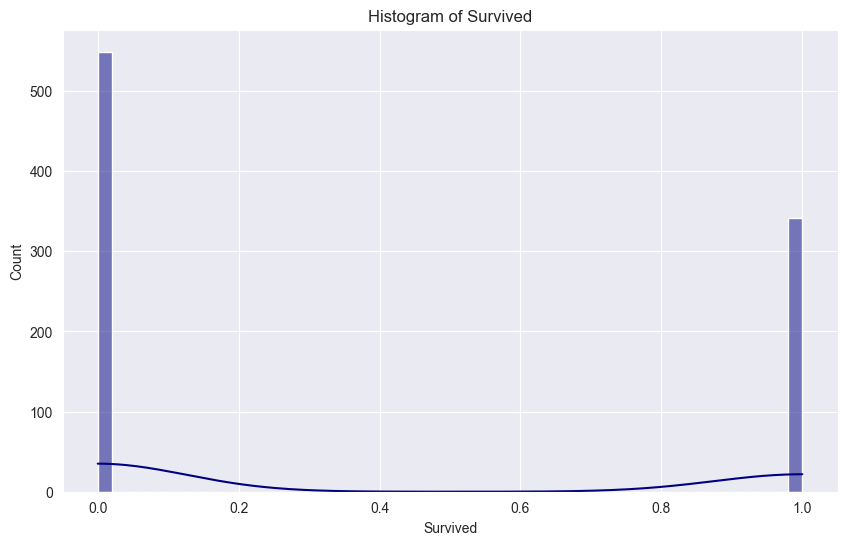

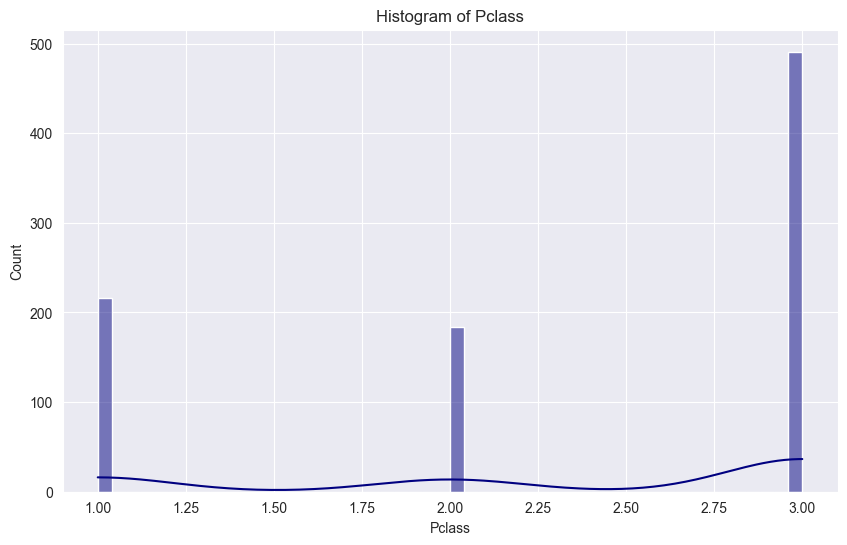

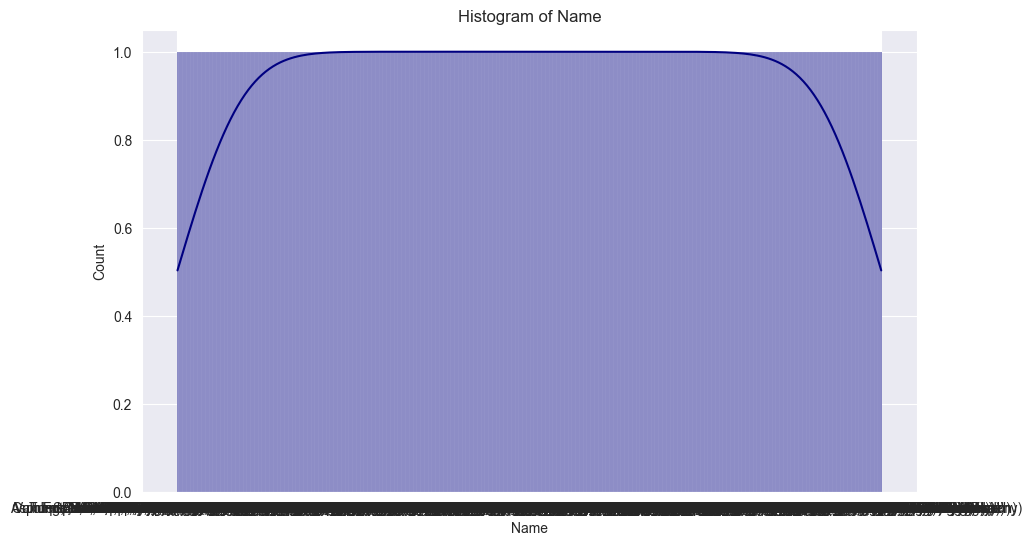

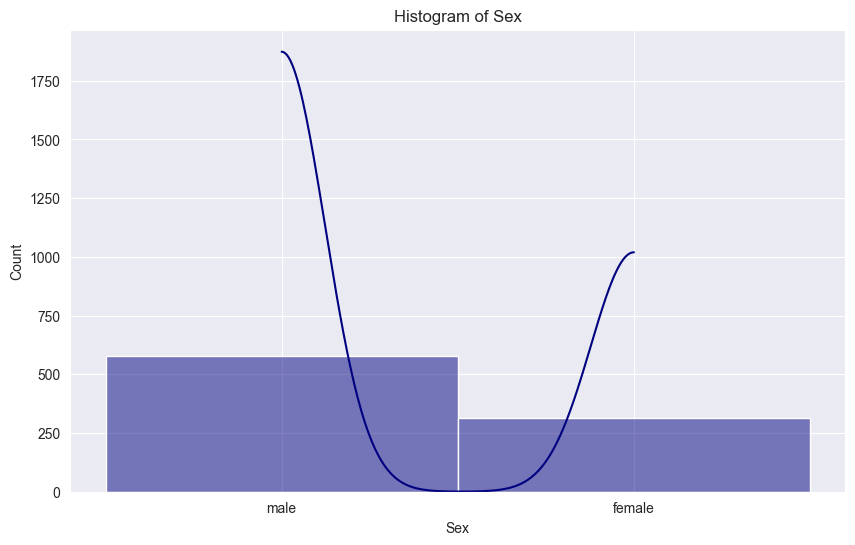

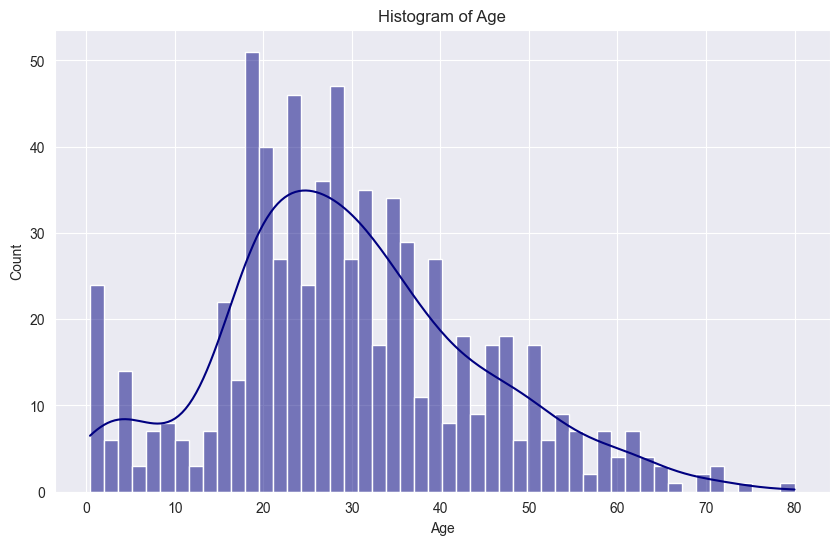

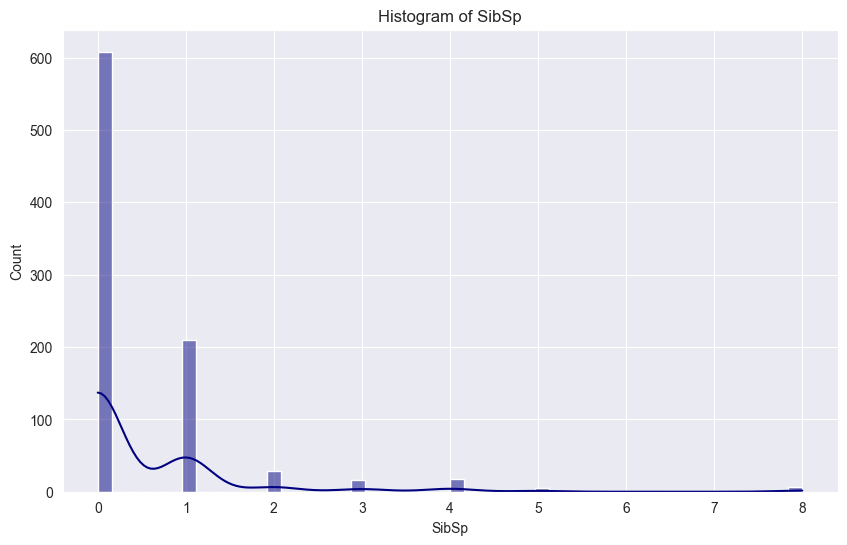

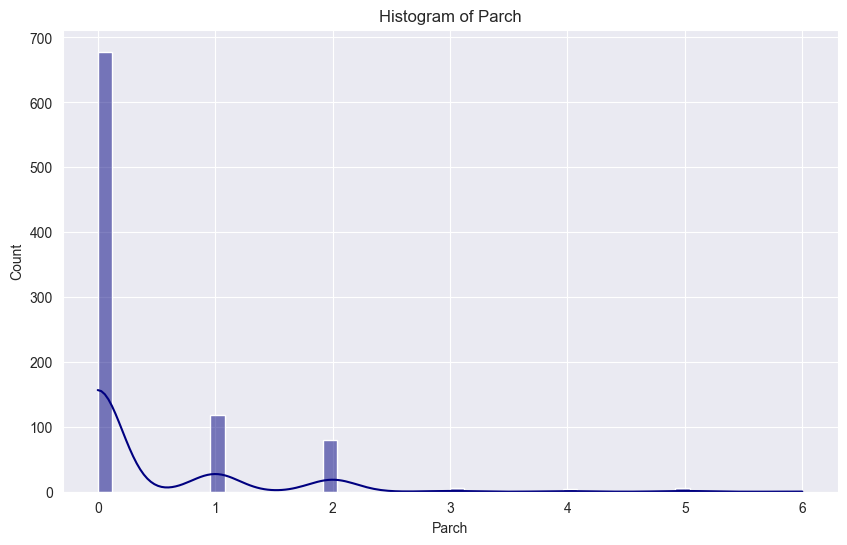

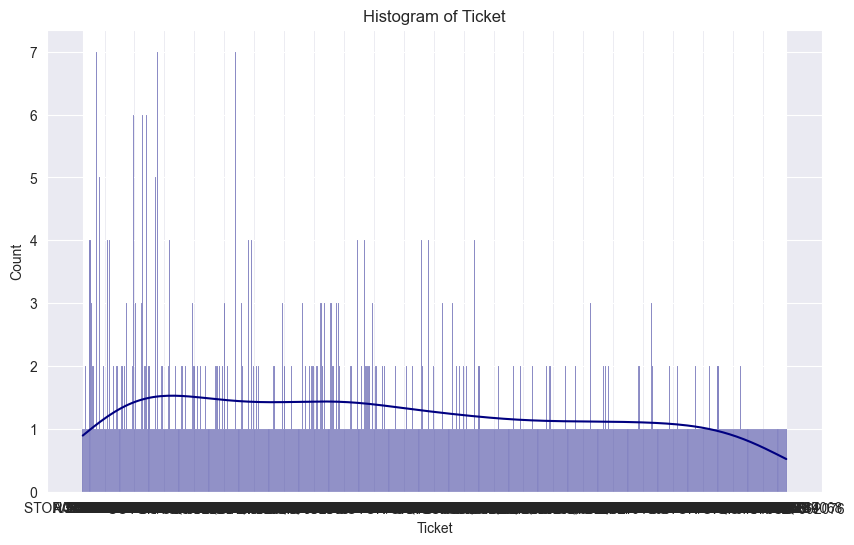

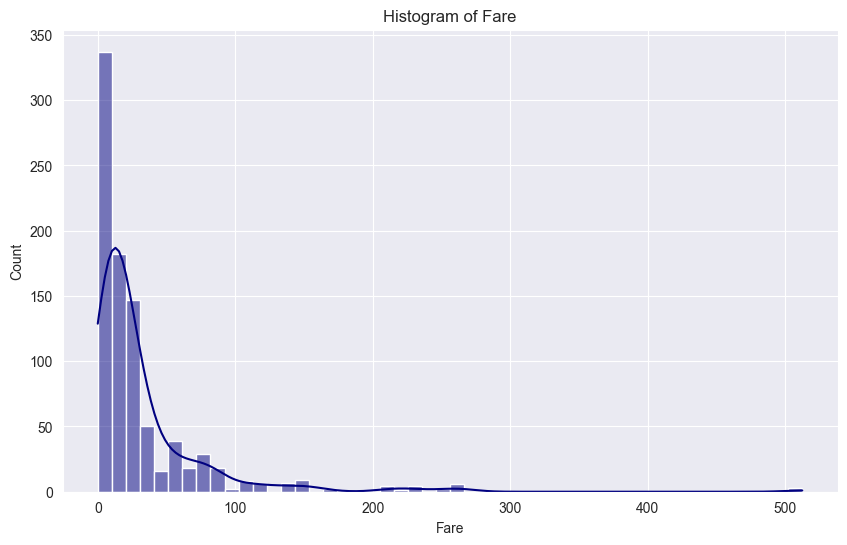

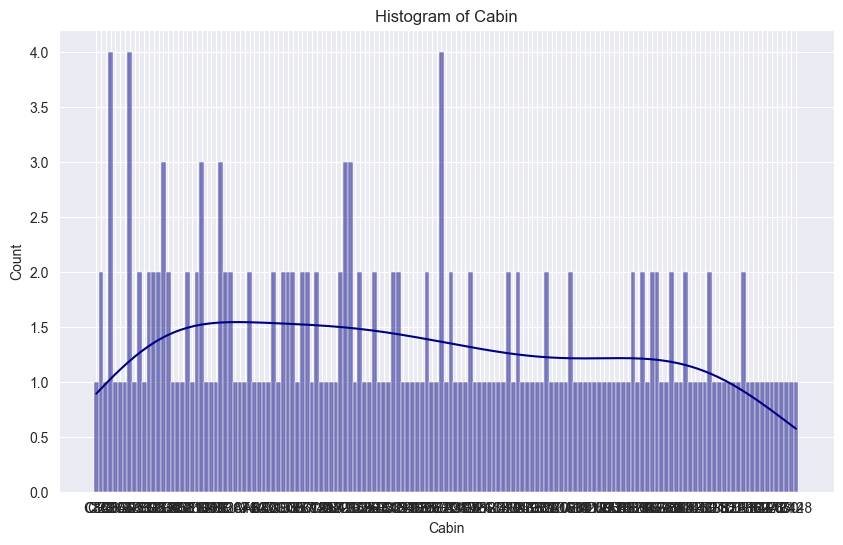

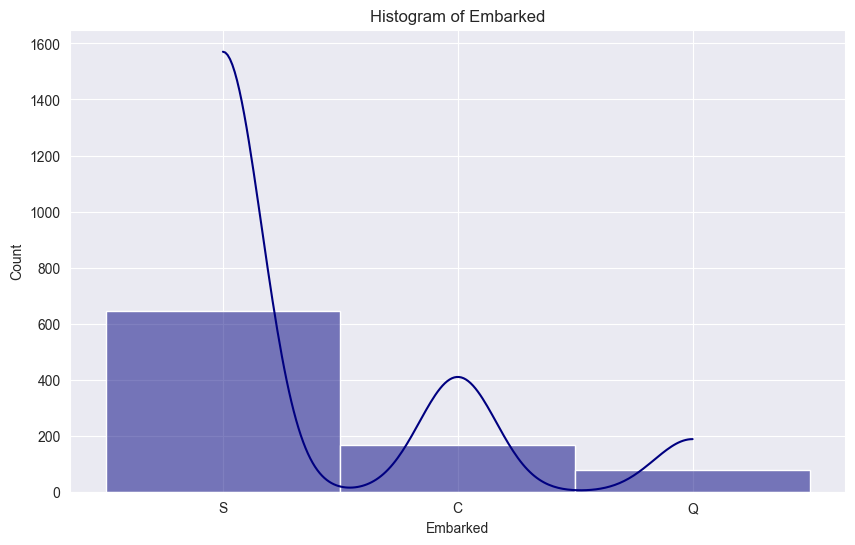

In [79]:
display_data(train_data)

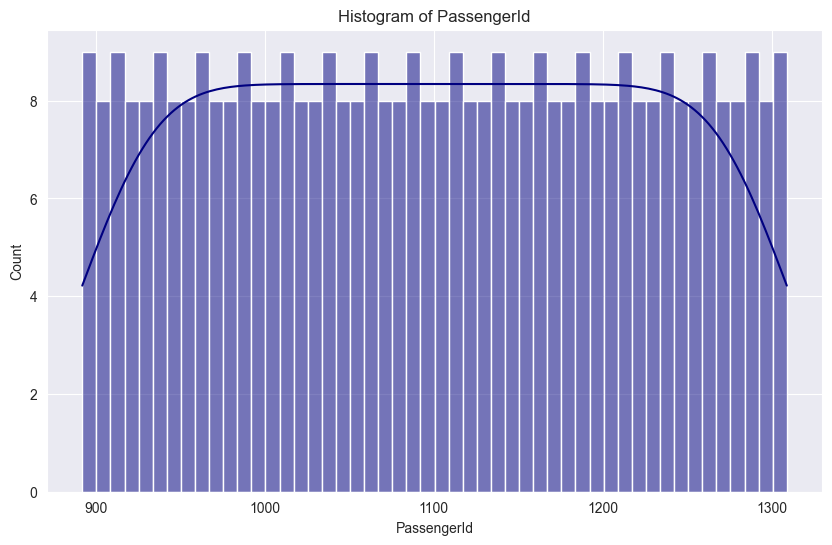

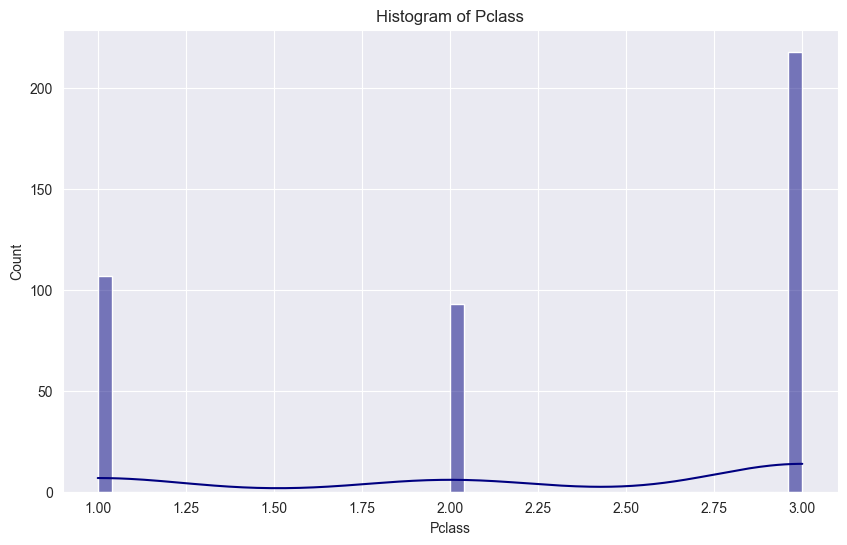

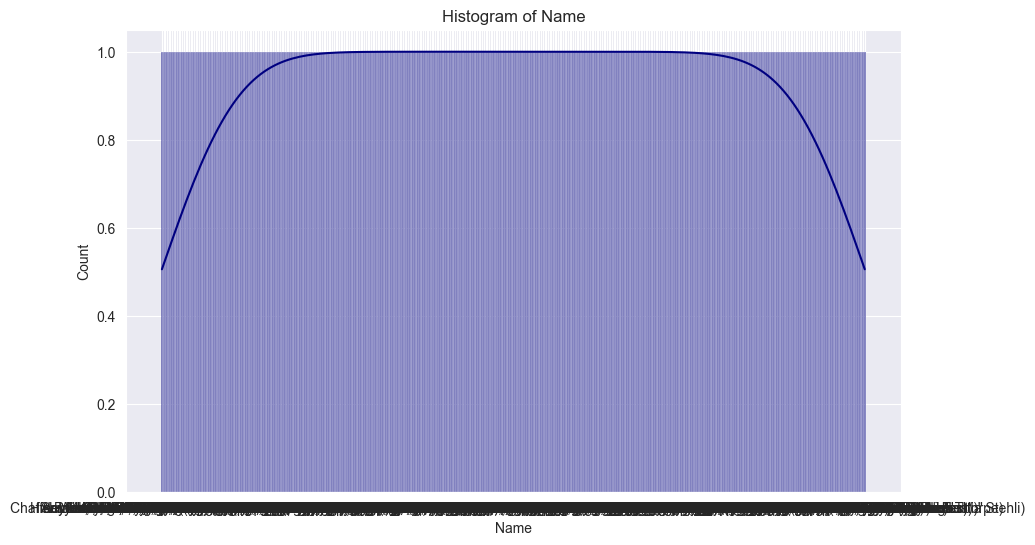

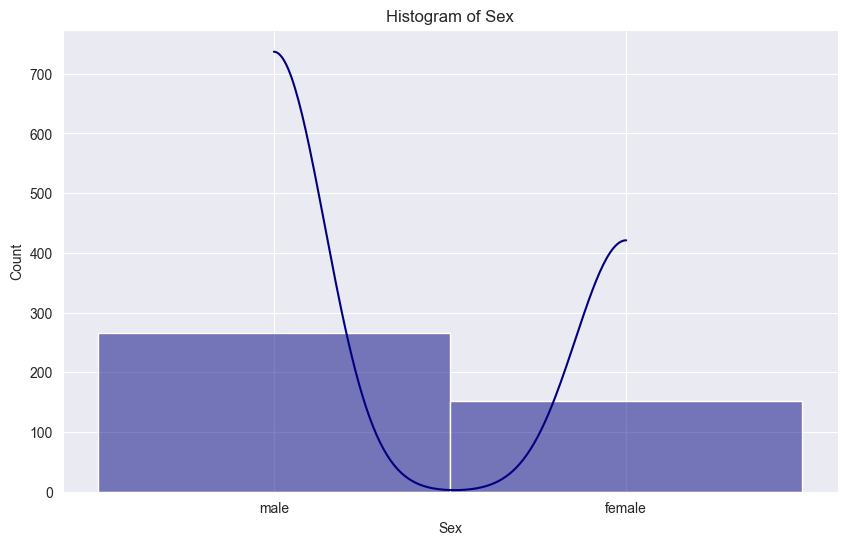

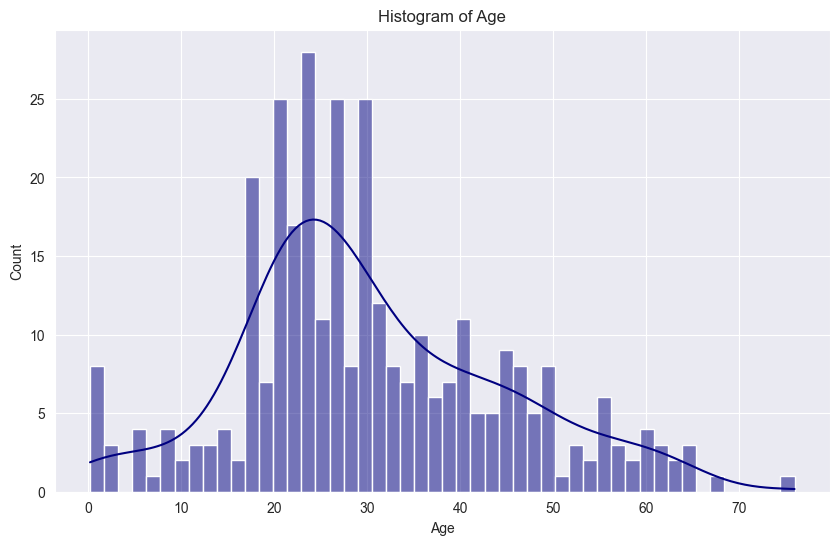

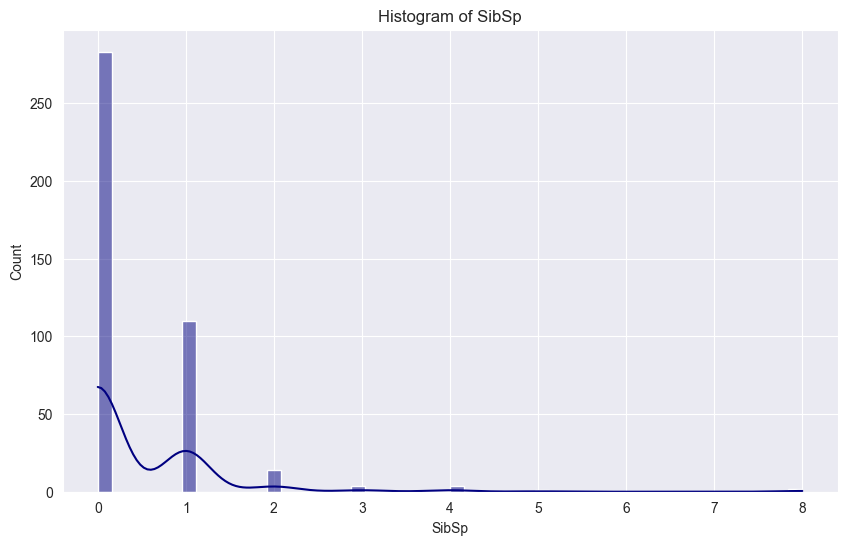

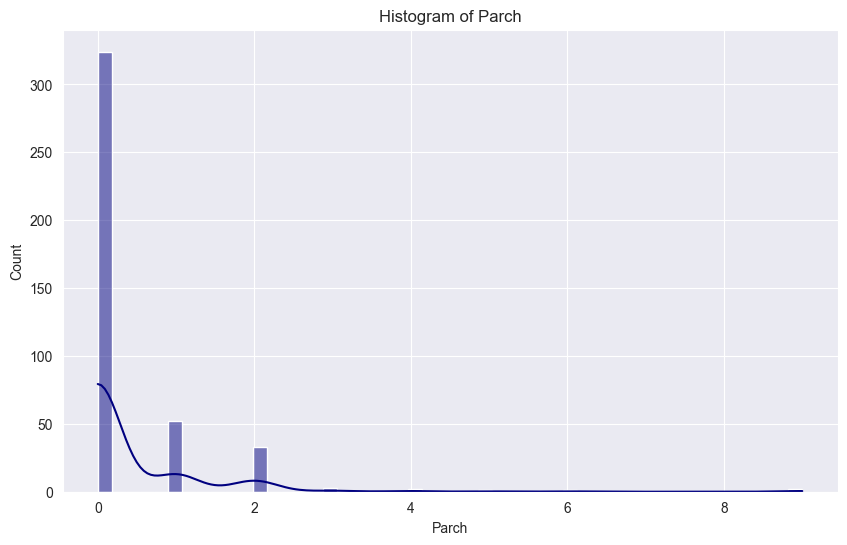

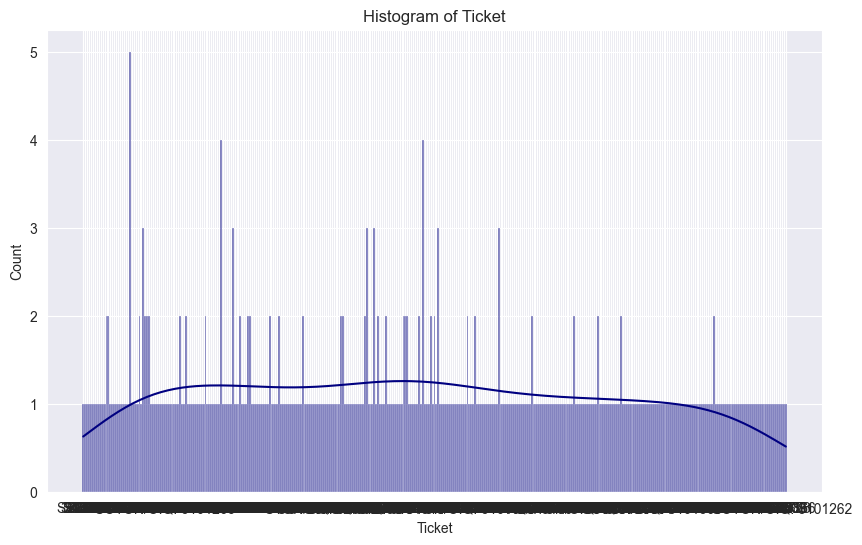

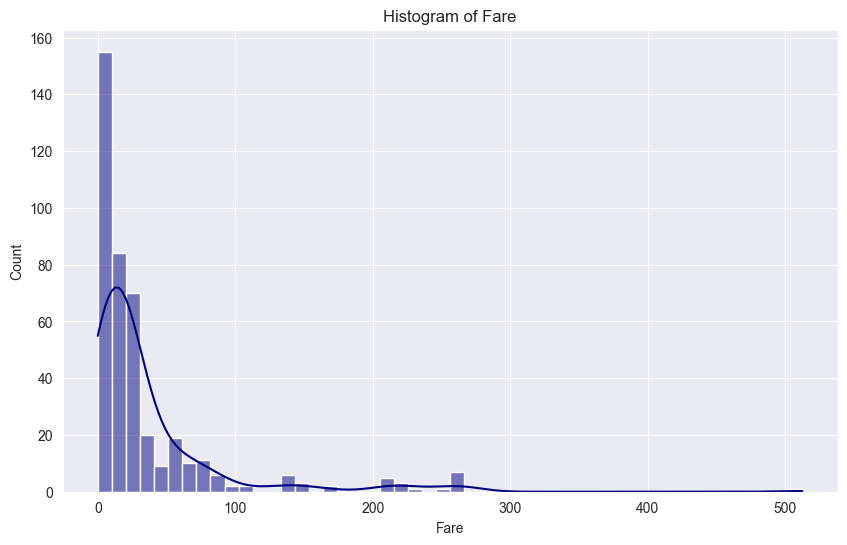

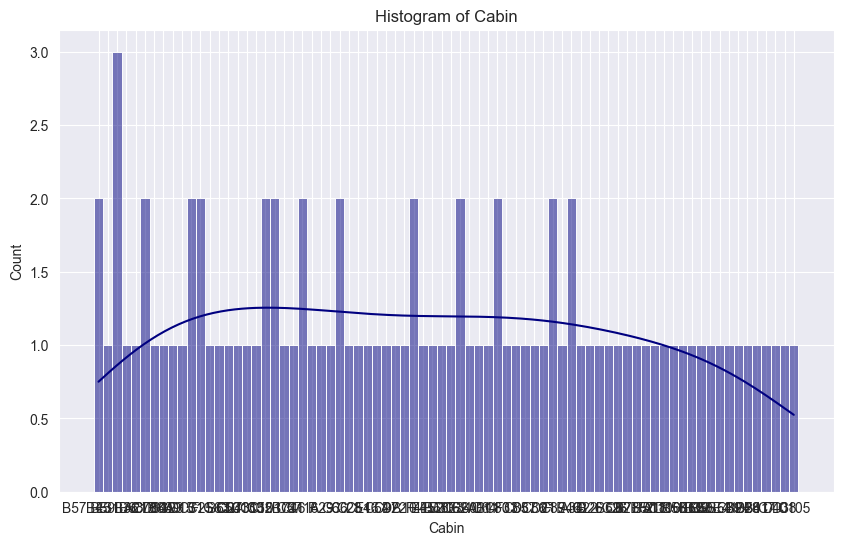

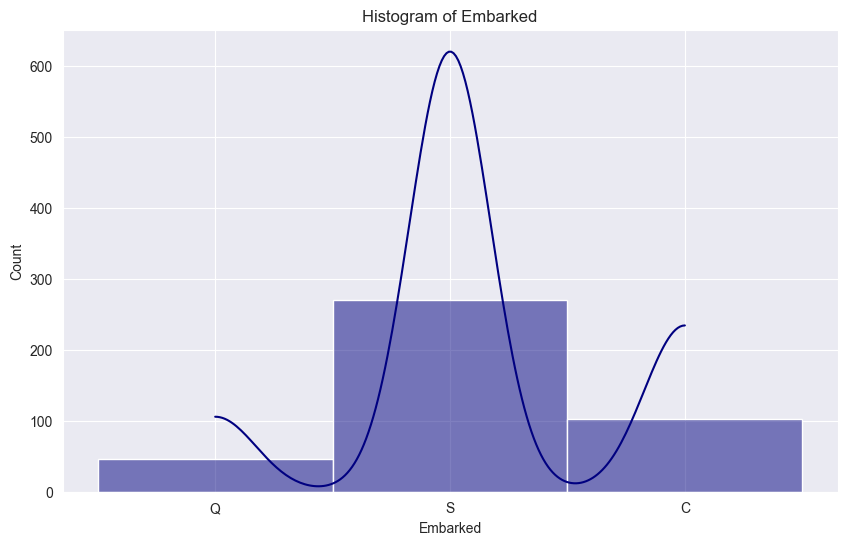

In [80]:
display_data(test_data)

Очевидно, що нам не потрібні колонки PassengerId, Name, Ticket та Cabin. Видалимо їх.

In [81]:
def drop_cols(data, array):
    data.drop(array, axis=1, inplace=True)

cols_to_remove = ['PassengerId', 'Name', 'Ticket', 'Cabin']
drop_cols(train_data, cols_to_remove)
drop_cols(test_data, cols_to_remove)

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [82]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


Також заповнимо пропуски в даних

In [83]:
def fill_absent(data: pd.DataFrame):
    data_c = data.copy()
    
    for col in data.columns:
        if data[col].dtype in ['object']:
            data_c[col] = data[col].fillna(data[col].mode()[0])
        elif data[col].dtype in ['int64', 'float64']:
             data_c[col] = data[col].fillna(data[col].mean())      
        
    return data_c

fill_train_data = fill_absent(train_data)
fill_test_data = fill_absent(test_data)


In [84]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [85]:
fill_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


А також останнім етапом для колонок Sex та Embarked замінимо значення object на enum

In [87]:
fill_train_data.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)
fill_test_data.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)

fill_train_data.infer_objects(copy=False)
fill_test_data.infer_objects(copy=False)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.50000,0,0,7.8292,2
1,3,1,47.00000,1,0,7.0000,0
2,2,0,62.00000,0,0,9.6875,2
3,3,0,27.00000,0,0,8.6625,0
4,3,1,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,0,30.27259,0,0,8.0500,0
414,1,1,39.00000,0,0,108.9000,1
415,3,0,38.50000,0,0,7.2500,0
416,3,0,30.27259,0,0,8.0500,0


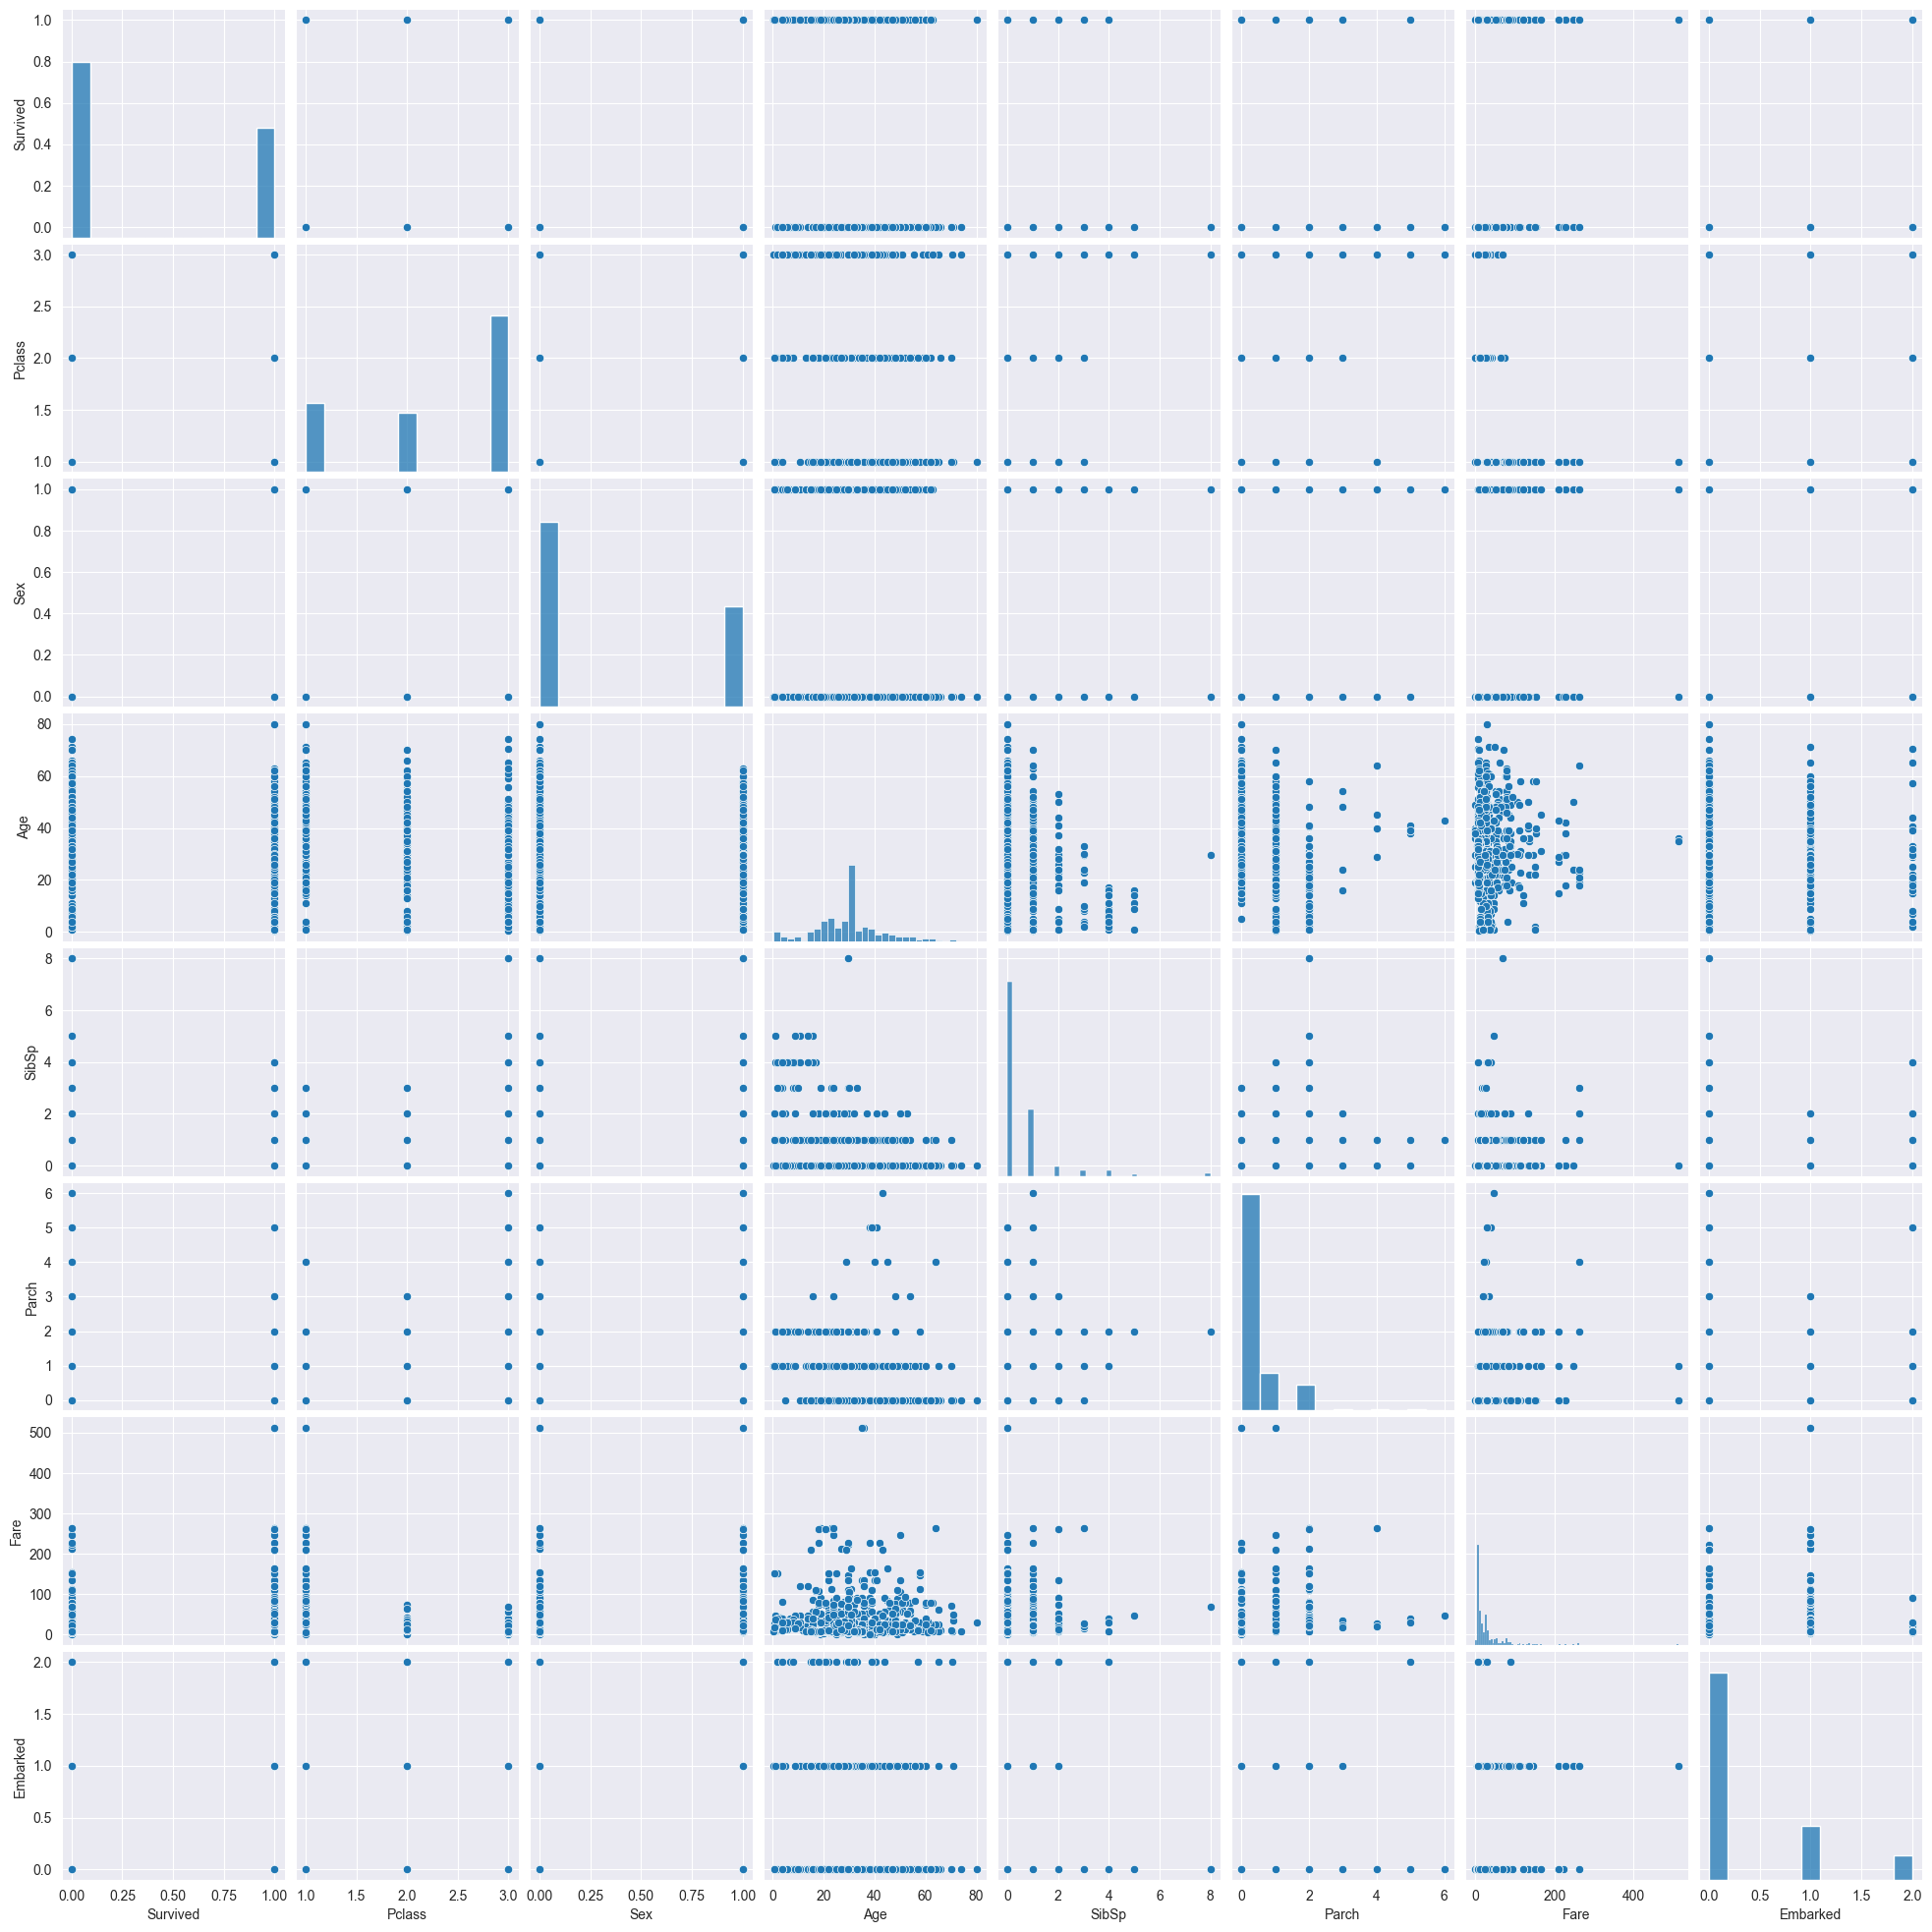

In [88]:
sns.pairplot(fill_train_data)

Застосуємо GaussianMixture метод

In [109]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

X = fill_train_data.drop('Survived', axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
testing = scaler.fit_transform(fill_test_data)

Оптимальна кількість кластерів рівна

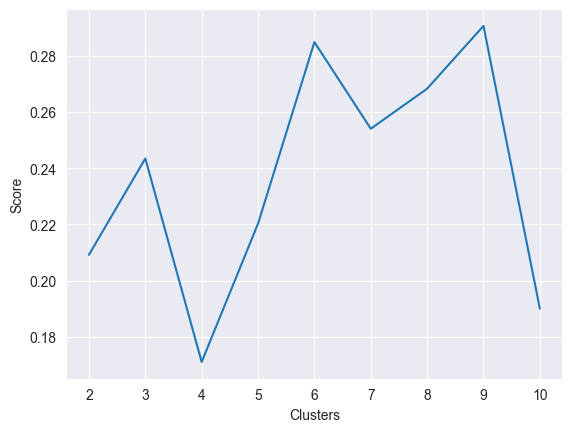

In [119]:
scores = []
for k in range(2, 11):
    GM = GaussianMixture(n_components=k, random_state=30)
    GM.fit(X)
    labels = GM.predict(X)
    
    score = silhouette_score(X, labels)
    scores.append(score)
    
plt.plot(range(2, 11), scores)
plt.xlabel('Clusters')
plt.ylabel('Score')
plt.show()

Найобтимальнішим є кількість кластерів рівна 3

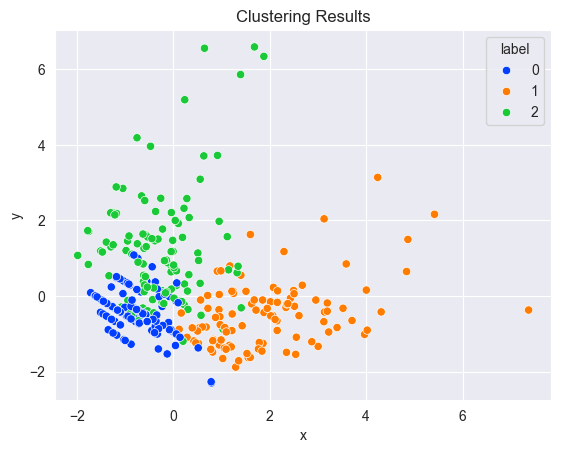

In [115]:
from sklearn.decomposition import PCA
GM = GaussianMixture(n_components=3, random_state=30)
GM.fit(testing)
labels = GM.predict(testing)

pca = PCA(n_components=2)
pca.fit(testing)
testing_pca = pca.transform(testing)

df = pd.DataFrame({'x': testing_pca[:, 0], 'y': testing_pca[:, 1], 'label': labels})
sns.scatterplot(data=df, x='x', y='y', hue='label', palette='bright')
plt.title('Clustering Results')
plt.show()
